In [135]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [136]:
data = pd.read_csv("/Users/atharva/Desktop/Python Projects  Personal/MNIST Neural Net from Scratch Using Numpy/Data/digit-recognizer/train.csv")

In [137]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
data = np.array(data)
m , n = data.shape
np.random.shuffle(data)

In [139]:
data_dev = data[0:1000].T

X_dev = data_dev[1:n]
X_dev = X_dev/255
Y_dev = data_dev[0]

data_train = data[1000:m].T

X_train = data_train[1:n]
X_train = X_train/255
Y_train = data_train[0]

_,m_train = X_train.shape

In [140]:
print(f'y_train is : {Y_train} \nand \nshape of y_train is : {Y_train.shape}')

y_train is : [8 6 4 ... 5 0 5] 
and 
shape of y_train is : (41000,)


In [141]:
print(f'X_train is : {X_train} \nand \nshape of X_train is : {X_train[0:n].shape}')

X_train is : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
and 
shape of X_train is : (784, 41000)


In [162]:

def init_params():
    W1 = np.random.rand(10, 784) - 0.5  #use rand() instead of randn() grad was not descending due to improper initialisation
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
    
    return W1,b1,W2,b2
    

In [163]:
def ReLU(Z):
    return np.maximum(Z,0)

def deriv_ReLU(Z):
    return Z > 0

In [164]:
def SoftMax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [165]:
def one_hot_encode(Y):
    one_hot_y = np.zeros((Y.size, Y.max() + 1))
    one_hot_y[np.arange(Y.size), Y] = 1 
    one_hot_y = one_hot_y.T
    return one_hot_y

In [166]:
def forward_pass(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1) 
    Z2 = W2.dot(A1) + b2
    A2 = SoftMax(Z2)
    return Z1, A1, Z2, A2

In [167]:
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_y = one_hot_encode(Y)    
    dZ2 = A2 - one_hot_y
    dW2 = 1 / m  * dZ2.dot(A1.T)
    db2 = 1 / m  * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m  * dZ1.dot(X.T)
    db1 = 1 / m  * np.sum(dZ1) 
    return dW1, db1, dW2, db2

In [168]:
def get_predictions(A2):
    return np.argmax(A2,0)
    
def get_accuracy(predictions, Y):
    print(predictions,Y)
    return np.sum(predictions==Y)/Y.size

In [169]:
def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_pass(W1,b1,W2,b2,X)
        dW1, dB1, dW2, dB2 = back_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1, b1, W2, b2 = update_parameters(W1,b1,W2,b2,dW1,dB1,dW2,dB2,alpha)
        if i%10==0:
            print("iterations:",i)
            predictions=get_predictions(A2)
            print("Accuracy:",get_accuracy(predictions, Y))
    return W1,b1,W2,b2
        

In [170]:
W1,b1,W2,b2= gradient_descent(X_train,Y_train,500,0.10)

iterations: 0
[1 1 9 ... 1 0 1] [8 6 4 ... 5 0 5]
Accuracy: 0.15495121951219512
iterations: 10
[7 0 4 ... 2 0 7] [8 6 4 ... 5 0 5]
Accuracy: 0.2631219512195122
iterations: 20
[7 0 4 ... 2 0 7] [8 6 4 ... 5 0 5]
Accuracy: 0.3201219512195122
iterations: 30
[7 0 4 ... 2 0 7] [8 6 4 ... 5 0 5]
Accuracy: 0.3763170731707317
iterations: 40
[7 0 4 ... 2 0 7] [8 6 4 ... 5 0 5]
Accuracy: 0.43178048780487804
iterations: 50
[8 1 4 ... 5 0 7] [8 6 4 ... 5 0 5]
Accuracy: 0.4899512195121951
iterations: 60
[8 1 4 ... 5 0 7] [8 6 4 ... 5 0 5]
Accuracy: 0.5521219512195122
iterations: 70
[8 1 4 ... 5 0 7] [8 6 4 ... 5 0 5]
Accuracy: 0.5894878048780487
iterations: 80
[5 1 4 ... 5 0 7] [8 6 4 ... 5 0 5]
Accuracy: 0.6201951219512195
iterations: 90
[8 1 4 ... 5 0 7] [8 6 4 ... 5 0 5]
Accuracy: 0.645
iterations: 100
[8 1 4 ... 5 0 7] [8 6 4 ... 5 0 5]
Accuracy: 0.6669756097560976
iterations: 110
[8 1 4 ... 5 0 7] [8 6 4 ... 5 0 5]
Accuracy: 0.684609756097561
iterations: 120
[8 1 4 ... 5 0 7] [8 6 4 ... 5 0 5]

In [171]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_pass(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  2


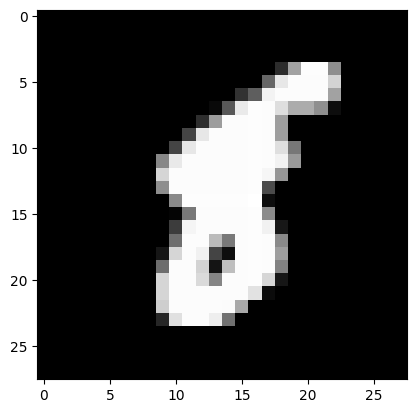

Prediction:  [6]
Label:  2


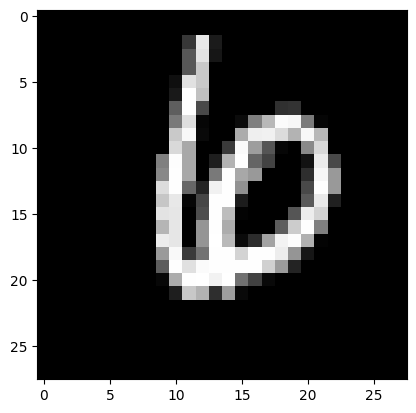

Prediction:  [4]
Label:  5


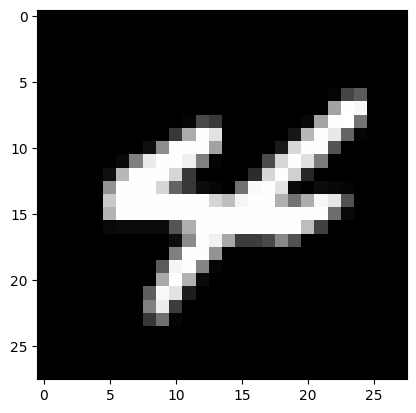

Prediction:  [7]
Label:  5


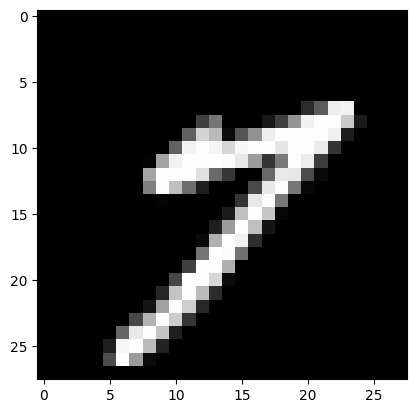

In [172]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)